# Note
The sign in small d matrix is quite confusing; I eventually used (-1)**(k + mp - m) convention instad of (-1)**k convention  
The results are consistent with using sympy package


This Notebook is to generate the theorectical formula of CSA using spherial harmonics representation with differnt orientation 

The main idea is 
1. we know how the matrix is like in the principal frame  
2. we can use Wigner D matrix to transform to the lab frame (here we choose arbitory orientation, to-do is to sum over a power averge)  
3. we know the spin part matrix in lab frame, then we can turn it into SH represenation
4. we could use secular approximation to simulate linewdith (to-do)
5. we could use these formula for relaxation correlation calculation (to-do)

In [59]:
# Here is cell to generate the theoretical formula of CSA using spherical harmonics representation with different orientations
import sympy as sp
from sympy.physics.quantum.spin import Rotation

# Define symbolic variables for Euler angles and tensor coefficients
alpha, beta, gamma = sp.symbols('alpha beta gamma', real=True)
iso, delta_xx, delta_yy, delta_zz = sp.symbols('iso delta_xx delta_yy delta_zz', real=True)

#iso=1/3*(delta_xx + delta_yy + delta_zz)
# Define the original coefficients T_{2m}
T_2m = {
    -2: 0.5 * (delta_xx - delta_yy),
    -1: 0,
    0: sp.sqrt(3/2) * (delta_zz-iso),
    1: 0,
    2: 0.5 * (delta_xx - delta_yy)
}


# old code for Wigner d-matrix elements (commented out), now use sympy package
# s = sp.sin(beta)
# c = sp.cos(beta)
# sqrt6= sp.sqrt(6)

# Reduced Wigner d-matrix elements for l=2
# d_2_corrected = sp.Matrix([
#     [0.25*(1 + c)**2,        0.5*s*(1 + c),         sqrt6/4 * s**2,        0.5*s*(1 - c),        0.25*(1 - c)**2],
#     [-0.5*s*(1 + c),         c*(1 + c),             sqrt6/2 * s * c,       c*(1 - c),           0.5*s*(1 - c)],
#     [sqrt6/4 * s**2,        -sqrt6/2 * s * c,       0.5*(3*c**2 - 1),      sqrt6/2 * s * c,     sqrt6/4 * s**2],
#     [0.5*s*(1 + c),          c*(1 + c),            -sqrt6/2 * s * c,       c*(1 - c),          -0.5*s*(1 - c)],
#     [0.25*(1 + c)**2,       -0.5*s*(1 + c),         sqrt6/4 * s**2,       -0.5*s*(1 - c),       0.25*(1 - c)**2]
# ])

# Construct the full Wigner D-matrix for l=2
m_values = [-2, -1, 0, 1, 2]
D_2 = sp.zeros(5, 5)
for i, m1 in enumerate(m_values):
    for j, m2 in enumerate(m_values):
        D_2[i, j] = sp.exp(-sp.I * m1 * alpha) * Rotation.d(2,m1,m2,beta) * sp.exp(-sp.I * m2 * gamma)

# Define the transformation of T_{2m} under the Wigner D-matrix
T_transformed = sp.zeros(5, 1)
for i, m in enumerate(m_values):
    for j, m2 in enumerate(m_values):
        T_transformed[i] += D_2[i, j] * T_2m[m2]

# Display the transformed tensor coefficients
T_transformed_simplified = sp.simplify(T_transformed)
sp.pprint(T_transformed_simplified[2], use_unicode=True)


⎛                         2      ⎛                       2⋅ⅈ⋅γ    2            ↪
⎜0.125⋅√6⋅(δₓₓ - δ_yy)⋅sin (β) + ⎜0.125⋅√6⋅(δₓₓ - δ_yy)⋅ℯ     ⋅sin (β) + 1.224 ↪
⎝                                ⎝                                             ↪

↪                          ⎛3⋅cos(2⋅β)   1⎞⎞  2⋅ⅈ⋅γ⎞  -2⋅ⅈ⋅γ
↪ 74487139159⋅(δ_zz - iso)⋅⎜────────── + ─⎟⎟⋅ℯ     ⎟⋅ℯ      
↪                          ⎝    4        4⎠⎠       ⎠        


In [60]:
expr = T_transformed_simplified[2]*np.sqrt(2/3) # use your actual expression index here

# Constant values
iso_val = 170
delta_xx_val = 95
delta_yy_val = 190
delta_zz_val = 3 * iso_val - delta_xx_val - delta_yy_val  # 510 - 285 = 225
delta_val = delta_zz_val-iso_val  # 

alpha_val = 0
beta_val = 0 
gamma_val = 0

# Create a lambdified function for fast numeric evaluation
expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta_zz), expr, modules="numpy")
value = expr_func(alpha_val, beta_val, gamma_val, iso_val, delta_xx_val, delta_yy_val, delta_zz_val) + iso_val/3

print(f"chemical shift: {value:.2f} ppm")

chemical shift: 111.67+0.00j ppm


(α=0.00, β=0.00, γ=0.00) → 281.67
(α=0.00, β=0.00, γ=0.33) → 281.67
(α=0.00, β=0.00, γ=0.66) → 281.67
(α=0.00, β=0.00, γ=0.99) → 281.67
(α=0.00, β=0.00, γ=1.32) → 281.67


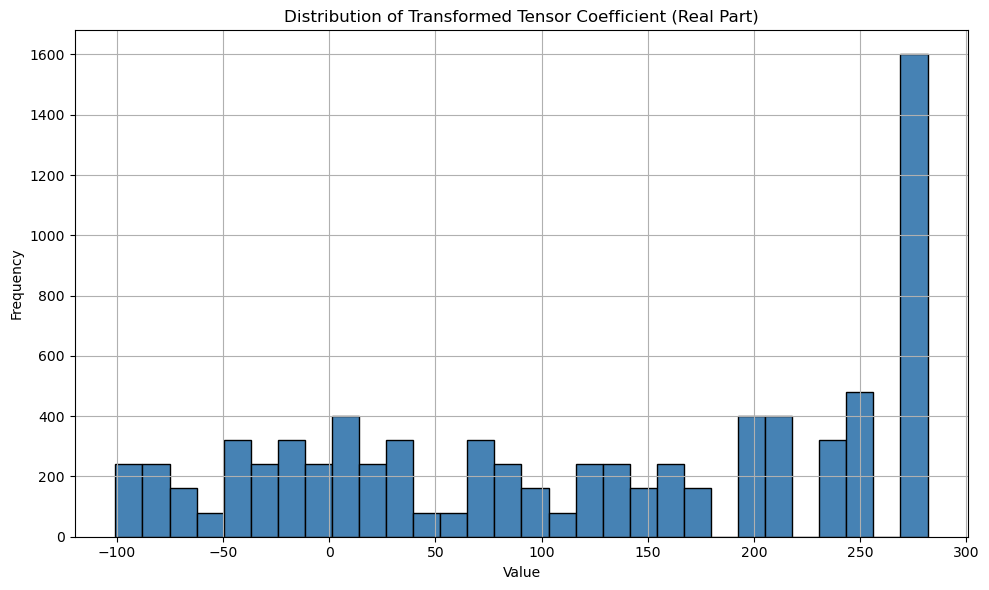

In [50]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
alpha, beta, gamma = sp.symbols('alpha beta gamma')
iso, delta_xx, delta_yy, delta = sp.symbols('iso delta_xx delta_yy delta')

# Example expression list (replace this with your actual one)
# Assuming T_transformed_simplified is already defined
# For example: T_transformed_simplified = [some sympy expressions...]
# Here we mock one expression for illustration:
# T_transformed_simplified = [some complex expression involving alpha, beta, gamma, etc.]

# Select the expression you want to scan
expr = T_transformed_simplified[2]*np.sqrt(2/3) # use your actual expression index here

# Constant values
iso_val = 170
delta_xx_val = 95
delta_yy_val = 190
delta_zz_val = 3 * iso_val - delta_xx_val - delta_yy_val  # 510 - 285 = 225
delta_val = iso_val -delta_zz_val  # 170 - 225 = -55

# Create a lambdified function for fast numeric evaluation
expr_func = sp.lambdify((alpha, beta, gamma, iso, delta_xx, delta_yy, delta), expr, modules="numpy")

# Define scan grid
alpha_vals = np.linspace(0, 2 * np.pi, 20)
beta_vals = np.linspace(0, np.pi, 20)
gamma_vals = np.linspace(0, 2 * np.pi, 20)

# Storage for results
results = []

# Evaluate on grid
for a in alpha_vals:
    for b in beta_vals:
        for g in gamma_vals:
            try:
                value = expr_func(a, b, g, iso_val, delta_xx_val, delta_yy_val, delta_val)
                results.append(((a, b, g), np.real(value)+ iso_val/3))  # Add iso_val to the result
            except Exception as e:
                print(f"Error at (α={a:.2f}, β={b:.2f}, γ={g:.2f}): {e}")

# Print a few results
for orientation, val in results[:5]:
    a, b, g = orientation
    print(f"(α={a:.2f}, β={b:.2f}, γ={g:.2f}) → {val:.2f}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist([val for _, val in results], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Transformed Tensor Coefficient (Real Part)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
D_2

Matrix([
[exp(2*I*alpha)*exp(2*I*gamma)*WignerD(2, -2, -2, 0, beta, 0), exp(2*I*alpha)*exp(I*gamma)*WignerD(2, -2, -1, 0, beta, 0), exp(2*I*alpha)*WignerD(2, -2, 0, 0, beta, 0), exp(2*I*alpha)*exp(-I*gamma)*WignerD(2, -2, 1, 0, beta, 0), exp(2*I*alpha)*exp(-2*I*gamma)*WignerD(2, -2, 2, 0, beta, 0)],
[  exp(I*alpha)*exp(2*I*gamma)*WignerD(2, -1, -2, 0, beta, 0),   exp(I*alpha)*exp(I*gamma)*WignerD(2, -1, -1, 0, beta, 0),   exp(I*alpha)*WignerD(2, -1, 0, 0, beta, 0),   exp(I*alpha)*exp(-I*gamma)*WignerD(2, -1, 1, 0, beta, 0),   exp(I*alpha)*exp(-2*I*gamma)*WignerD(2, -1, 2, 0, beta, 0)],
[                exp(2*I*gamma)*WignerD(2, 0, -2, 0, beta, 0),                 exp(I*gamma)*WignerD(2, 0, -1, 0, beta, 0),                 WignerD(2, 0, 0, 0, beta, 0),                 exp(-I*gamma)*WignerD(2, 0, 1, 0, beta, 0),                 exp(-2*I*gamma)*WignerD(2, 0, 2, 0, beta, 0)],
[  exp(-I*alpha)*exp(2*I*gamma)*WignerD(2, 1, -2, 0, beta, 0),   exp(-I*alpha)*exp(I*gamma)*WignerD(2, 1, -1, 0, be

In [3]:
from sympy.physics.quantum.spin import Rotation
d_val = Rotation.d(2,1, -1, 0.2)

# Evaluate numerically
d_num = d_val.doit().evalf()

print(d_num)


0.0295027919191783


In [10]:
# verify the correctness of the Wigner d-matrix D_2
#calculate the numerical values for alpha, beta, gamma
import numpy as np
import math
from math import factorial as fact
alpha_val = 0.1  # Example value in radians
beta_val = 0.2   # Example value in radians
gamma_val = 0.3  # Example value in radians
#D_2_numeric = D_2.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val}).doit().evalf()
D_2 = np.zeros((2*2+1, 2*2+1), dtype=complex)
for i, mp in enumerate(range(-2, 3)):
    for j, m in enumerate(range(-2, 3)):
        D_2[i, j]= Rotation.D(2, mp, m, alpha_val,beta_val, gamma_val).doit().evalf()
        #D_2[i, j] = np.exp(-1j * mp * alpha_val) * d * np.exp(-1j * m * gamma_val)
#D_2_numeric = Rotation.D(2, alpha_val, beta_val, gamma_val).doit().evalf()

# Known working Wigner d-matrix for l=2

def little_d(l, mp, m, beta):
    """
    Compute small-d matrix element d^l_{mp,m}(beta) using Wikipedia convention 
    """
    sum_k = 0
    kmin = max(0, m - mp)
    kmax = min(l + m, l - mp)

    prefactor = np.sqrt(fact(l + mp) * fact(l - mp) * fact(l + m) * fact(l - m))

    for k in range(kmin, kmax + 1):
        denom = (
            fact(l + m - k)
            * fact(k)
            * fact(l - mp - k)
            * fact(k + mp - m)
        )
        if denom == 0:
            continue  # skip undefined terms
        term = ((-1)**(k + mp - m)/ denom *
                (np.cos(beta / 2) ** (2 * l + m - mp - 2 * k)) *
                (np.sin(beta / 2) ** (2 * k + mp - m)))
        sum_k += term

    return prefactor * sum_k

def wigner_d_matrix(l, alpha, beta, gamma):
    """
    Compute Wigner D-matrix D^l_{m', m}(alpha, beta, gamma)
    without using scipy.special
    """
    m_vals = np.arange(-l, l+1)
    D = np.zeros((2*l+1, 2*l+1), dtype=complex)

    # def little_d(l, mp, m, beta):
    #     """Compute small-d matrix element d^l_{mp,m}(beta)"""
    #     sum_k = 0
    #     kmin = max(0, m - mp)
    #     kmax = min(l + m, l - mp)
    #     for k in range(kmin, kmax + 1):
    #         num = ((-1)**k *
    #                np.sqrt(fact(l + mp) * fact(l - mp) * fact(l + m) * fact(l - m)))
    #         denom = (fact(l + m - k) * fact(l - mp - k) * fact(k) * fact(k + mp - m))
    #         term = (num / denom *
    #                 (np.cos(beta / 2) ** (2 * l + m - mp - 2 * k)) *
    #                 (np.sin(beta / 2) ** (2 * k + mp - m)))
    #         sum_k += term
    #     return sum_k

    

    for i, mp in enumerate(m_vals):
        for j, m in enumerate(m_vals):
            d = little_d(l, mp, m, beta)
            D[i, j] = np.exp(-1j * mp * alpha) * d * np.exp(-1j * m * gamma)

    return D

# Verify the correctness of the Wigner d-matrix D_2
D_2_test = wigner_d_matrix(2, alpha_val, beta_val, gamma_val)
# Check if the numerical values match
D_2_numeric = np.array(D_2)
D_2_test = np.array(D_2_test)

print(D_2_numeric.shape, D_2_test.shape)
#print(np.allclose(D_2_numeric, D_2_test))
if np.allclose(D_2_numeric, D_2_test):
    print("The Wigner d-matrix D_2 is correct.")
else:
    print("The Wigner d-matrix D_2 is incorrect.")
#print(D_2_test)
#print(D_2_numeric)


(5, 5) (5, 5)
The Wigner d-matrix D_2 is correct.


In [6]:
D_2

array([[ 6.82888168e-01+7.03127988e-01j,  1.72611057e-01+9.42978501e-02j,
         2.36882442e-02+4.80184482e-03j,  1.97018767e-03-1.97678134e-04j,
         9.14938975e-05-3.86829994e-05j],
       [-1.50436237e-01-1.26710694e-01j,  8.75527226e-01+3.70166974e-01j,
         2.37277707e-01+2.38071809e-02j,  2.89147003e-02-5.86129993e-03j,
         1.73768352e-03-9.49300834e-04j],
       [ 1.99483913e-02+1.36474287e-02j, -2.27818193e-01-7.04724255e-02j,
         9.40795746e-01+0.00000000e+00j,  2.27818193e-01-7.04724255e-02j,
         1.99483913e-02-1.36474287e-02j],
       [-1.73768352e-03-9.49300834e-04j,  2.89147003e-02+5.86129993e-03j,
        -2.37277707e-01+2.38071809e-02j,  8.75527226e-01-3.70166974e-01j,
         1.50436237e-01-1.26710694e-01j],
       [ 9.14938975e-05+3.86829994e-05j, -1.97018767e-03-1.97678134e-04j,
         2.36882442e-02-4.80184482e-03j, -1.72611057e-01+9.42978501e-02j,
         6.82888168e-01-7.03127988e-01j]])

In [60]:
# calculate the correlation coefficients 
# multiplication of T_transformed_simplified 2 and 4 is the correlation coefficient
correlation_coefficient = T_transformed_simplified[1] * T_transformed_simplified[3]
correlation_coefficient_simplified = sp.simplify(correlation_coefficient)
sp.pprint(correlation_coefficient_simplified, use_unicode=True)


⎛                                          ⅈ⋅α   ⎛                        ⅈ⋅α  ↪
⎝0.125⋅(δₓₓ - δ_yy)⋅(2⋅sin(β) - sin(2⋅β))⋅ℯ    + ⎝0.306186217847897⋅√6⋅δ⋅ℯ   ⋅ ↪

↪                                            ⅈ⋅(α + 2⋅γ)       ⎞  2⋅ⅈ⋅γ⎞ ⎛     ↪
↪ sin(2⋅β) - 0.25⋅(δₓₓ - δ_yy)⋅(cos(β) + 1)⋅ℯ           ⋅sin(β)⎠⋅ℯ     ⎠⋅⎝0.25 ↪

↪                             ⅈ⋅α          ⎛                                   ↪
↪ ⋅(δₓₓ - δ_yy)⋅(cos(β) + 1)⋅ℯ   ⋅sin(β) + ⎝-0.306186217847897⋅√6⋅δ⋅sin(2⋅β) + ↪

↪                                  2⋅ⅈ⋅γ       ⎞  ⅈ⋅(α + 2⋅γ)⎞  -2⋅ⅈ⋅(α + 2⋅γ)
↪  0.25⋅(δₓₓ - δ_yy)⋅(cos(β) - 1)⋅ℯ     ⋅sin(β)⎠⋅ℯ           ⎠⋅ℯ              


In [ ]:
# simuluate the Pake pattern
# acording to the secular approximation, the Pake pattern is given by the IzBz part (T20 term)

import numpy as np

def generate_random_orientations(n_points):
    """
    Generate n_points orientations uniformly distributed over the unit sphere.
    Returns theta (polar angle) and phi (azimuthal angle).
    """
    phi = 2 * np.pi * np.random.rand(n_points)
    cos_theta = 2 * np.random.rand(n_points) - 1
    theta = np.arccos(cos_theta)
    return theta, phi

def powder_average(observable_function, n_orientations=1000):
    """
    Compute powder average by sampling orientations over the sphere.

    observable_function: function that takes (theta, phi) and returns a scalar value
    n_orientations: number of orientations to sample
    """
    theta, phi = generate_random_orientations(n_orientations)
    values = np.array([observable_function(t, p) for t, p in zip(theta, phi)])
    return np.mean(values)


def chemical_shift_calculator(theta, phi, iso):
    """
    Calculate the chemical shift for a given orientation defined by theta and phi.
    """

    # Calculate the CSA tensor components in the Cartesian basis
    T20 = iso + T_transformed_simplified[0].doit().evalf()*np.sqrt(3/2)
    return T20

In [10]:
# write a function to calculate the correlation coefficient to be calcuated numerically
import numpy as np
def calculate_transformed_tensor_coefficients(alpha_val, beta_val, gamma_val, iso_val, delta_xx_val, delta_yy_val, delta_val):
    """Calculate the transformed tensor coefficients for given Euler angles and tensor coefficients.
    Args:
        alpha_val (float): Euler angle alpha.
        beta_val (float): Euler angle beta.
        gamma_val (float): Euler angle gamma.
        iso_val (float): Isotropic part of the tensor.
        delta_xx_val (float): Coefficient for xx component.
        delta_yy_val (float): Coefficient for yy component.
        delta_val (float): Coefficient for zz component.
    Returns:
        float: The correlation coefficient calculated from the transformed tensor coefficients.
    """
    # write the corelation _coefficient_simplied as a function without using the sympy library
    #correlation_coefficient_simplified= 

    i = 1j
    sqrt6 = np.sqrt(6)
    
    term1 = -0.25 * (d_xx - d_yy) * (np.cos(beta) - 1) * np.exp(i * alpha)
    term2 = -(
        0.612372435695794 * sqrt6 * delta * np.cos(beta)
        - 0.25 * (d_xx - d_yy) * (np.cos(beta) + 1)
    ) * np.exp(i * (alpha + 2 * gamma))
    
    term3 = 0.25 * (d_xx - d_yy) * (np.cos(beta) - 1) * np.exp(i * alpha)
    term4 = (
        0.612372435695794 * sqrt6 * delta * np.cos(beta)
        - 0.25 * (d_xx - d_yy) * (np.cos(beta) + 1)
    ) * np.exp(i * alpha)
    
    term5 = 0.25 * (d_xx - d_yy) * (np.cos(beta) + 1) * np.exp(i * (alpha + 2 * gamma))
    term6 = 2 * np.exp(-2 * i * (alpha + 2 * gamma)) * np.sin(beta)**2

    result = term1 + term2 + term3 + term4 + term5 + term6
    return result


    return correlation_coefficient
    # Substitute the numerical values into the symbolic expressions
    # Substitute the numerical values into the transformed tensor coefficients  
    

In [11]:
# test if delta_xx and delta_yy are equal and gamma is zero
test_conditions = sp.simplify(sp.Eq(delta_xx, delta_yy) & sp.Eq(gamma, 0))
test_conditions_result = test_conditions.subs({delta_xx: 1, delta_yy: 1, gamma: 0})
#sp.pprint(test_conditions, use_unicode=True)
test_conditions_result_simplified = sp.simplify(test_conditions_result)
sp.pprint(test_conditions_result_simplified, use_unicode=True)

True


In [12]:
T_transformed_simplified[1]
# simplify T_transformed_simplified[1] with delata_xx = delta_yy and gamma = 0
simplified_T1 = sp.simplify(T_transformed_simplified[1].subs({delta_xx: delta_yy, gamma: 0}))
sp.pprint(simplified_T1, use_unicode=True)

                        ⅈ⋅α         
0.306186217847897⋅√6⋅δ⋅ℯ   ⋅sin(2⋅β)


In [13]:
T_transformed_simplified[3]
simplified_T3 = sp.simplify(T_transformed_simplified[3].subs({delta_xx: delta_yy, gamma: 0}))
sp.pprint(simplified_T3, use_unicode=True)

                        -ⅈ⋅α         
0.306186217847897⋅√6⋅δ⋅ℯ    ⋅sin(2⋅β)


In [14]:
T_transformed_simplified[3]
simplified_T2 = sp.simplify(T_transformed_simplified[2].subs({delta_xx: delta_yy, gamma: 0}))
sp.pprint(simplified_T2, use_unicode=True)

  ⎛                    2                       ⎞
δ⋅⎝1.83711730708738⋅cos (β) - 0.612372435695794⎠


In [15]:
def coefficient_2_m2(alpha, beta, gamma, iso, delta_xx, delta_yy, delta):
    """Calculate the coefficient T_{2,-2} for given Euler angles and tensor coefficients."""
    T'_(-2) = [
    0.125 * (δ_xx − δ_yy) * (cos(β) − 1)^2 * e^{2iα}
  + (0.3062 * δ * sin²(β) + 0.125 * (δ_xx − δ_yy) * (cos(β) + 1)^2 * e^{2iγ}) * e^{2iγ}
] * e^{-2iγ}
    return 0.5 * (delta_xx - delta_yy) * (1 + np.cos(beta))**2 * np.exp(-1j * 2 * alpha)

SyntaxError: EOL while scanning string literal (3670495321.py, line 3)

In [ ]:
import sympy as sp

# Define symbolic variables
alpha, beta, gamma = sp.symbols('alpha beta gamma', real=True)
delta_xx, delta_yy, delta = sp.symbols('delta_xx delta_yy delta', real=True)
i = sp.I

# Common expressions
cosb = sp.cos(beta)
sinb = sp.sin(beta)
deltadiff = delta_xx - delta_yy

# Define a dictionary of functions for T'_m
def T_prime_m(m, alpha, beta, gamma, delta_xx, delta_yy, delta):
    cosb = sp.cos(beta)
    sinb = sp.sin(beta)
    deltadiff = delta_xx - delta_yy

    if m == -2:
        return (
            0.125 * deltadiff * (cosb - 1)**2 * sp.exp(2*i*alpha)
            + (sp.sqrt(3/32) * delta * sinb**2 + 0.125 * deltadiff * (cosb + 1)**2 * sp.exp(2*i*gamma)) * sp.exp(2*i*gamma)
        ) * sp.exp(-2*i*gamma)

    elif m == -1:
        return (
            0.25 * deltadiff * (cosb - 1) * sp.exp(i*alpha)
            + (sp.sqrt(3/8) * delta * cosb - 0.25 * deltadiff * (cosb + 1) * sp.exp(2*i*gamma)) * sp.exp(i*(alpha + 2*gamma))
        ) * sp.exp(-2*i*gamma) * sinb

    elif m == 0:
        return (
            0.5 * sp.sqrt(6) * deltadiff * sinb**2
            + (4.899 * delta * (1.5 * cosb**2 - 0.5) + 0.5 * sp.sqrt(6) * deltadiff * sinb**2 * sp.exp(2*i*gamma)) * sp.exp(2*i*gamma)
        ) * sp.exp(-2*i*gamma) / 4

    elif m == 1:
        return (
            -0.25 * deltadiff * (cosb - 1) * sp.exp(i*alpha)
            + (sp.sqrt(3/8) * delta * cosb - 0.25 * deltadiff * (cosb + 1) * sp.exp(2*i*gamma)) * sp.exp(i*(alpha + 2*gamma))
        ) * sp.exp(-2*i*(alpha + gamma)) * sinb

    elif m == 2:
        return (
            0.125 * deltadiff * (cosb - 1)**2 * sp.exp(2*i*alpha)
            + (sp.sqrt(3/32) * delta * sinb**2 + 0.125 * deltadiff * (cosb + 1)**2 * sp.exp(2*i*gamma)) * sp.exp(2*i*(alpha + gamma))
        ) * sp.exp(-2*i*(2*alpha + gamma))

    else:
        raise ValueError("m must be in [-2, -1, 0, 1, 2]")


In [ ]:
expr = T_prime_m(0, alpha, beta, gamma, delta_xx, delta_yy, delta)
print(expr.simplify())

(0.5*sqrt(6)*(delta_xx - delta_yy)*sin(beta)**2 + (4.899*delta*(1.5*cos(beta)**2 - 0.5) + 0.5*sqrt(6)*(delta_xx - delta_yy)*exp(2*I*gamma)*sin(beta)**2)*exp(2*I*gamma))*exp(-2*I*gamma)/4


In [ ]:
expr.subs({
    alpha: 0.1,
    beta: 0.5,
    gamma: 0.2,
    delta_xx: 50,
    delta_yy: 30,
    delta: 20
}).evalf()

18.6426225096254 - 2.16840434497101e-19*I